# 인스타그램 워드클라우드

### #따릉이와 연관 해시태그 가져오기

### 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 한글폰트 설정
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

In [3]:
from konlpy.tag import Okt
okt = Okt()

In [37]:
# crawling_instar.txt 파일 보호를 위해 copy본을 이용함
with open('crawling_instar_copy2.txt','r',encoding='utf-8') as f:
    instar = f.read()

In [38]:
import nltk

In [39]:
import numpy as np 
from PIL import Image
from wordcloud import WordCloud

### 연관 해시태그 데이터 정제

In [40]:
instar_split =instar.split(",")

In [41]:
# 데이터정제
import re

new_tag_list=[]
for tag in instar_split:
    text = re.sub('[A-Za-z0-9#]','',tag)# 영어,숫자는 제외하려고 조작 
    #text = re.sub('#','',tag)
    if text:
        new_tag_list.append(text)

In [9]:
new_tag_list[0:10]

["'식단조절'",
 " '쿠팡샐러드'",
 " '쿠스쿠스샐러드'",
 " '자전거라이딩'",
 " '따릉이'",
 " '다이어트도시락'",
 " '다이어트식단'",
 " '다이어트식품'",
 " '다이어트기록'",
 " '따릉이'"]

In [50]:
# 데이터 정제 => new_tokens
stop_words = [" '따릉이'"," '팔로우'"," '🚲'",'맞팔','ロードバイク'," 'ロードバイク'"," '_'"," '좋아요'"," '좋아요반사'",
" '소통해요'"," '팔로워'"," '신세계의정부'"," '선팔하면맞팔'"," '선팔환영'"," '첫줄반사'",
" '선팔하면맞팔가요'"," '팔로우환영'"," '☀️'"," '먹스타맞팔'"," '맞팔환영'"," '맞팔해요'"," '선팔하면무조건맞팔'",
" '그냥'"," '🏃🏻\\'"," '선팔맞팔'"," '멍팔'"," '멍팔환영'"," '자전거'"," '따릉이🚲'"," '따릉이'"," '자전거'"," 'ㅋㅋㅋㅋ'"," '넌이름이뭐니🤔'", " '드로잉'"," '서울'"," '일상"," '셀카'"," '시원한공기'"," '따릉이'"," '좋아요'"," '자덕'","'운동'"," '서울'"," '일상스타그램'"," '일상'","'다이어트'"," '운동'"," '운동'"," '다이어트'"] # 자전거 추가 포함 정상한글이 아닌것을 제외
new_tokens = [word for word in new_tag_list if word not in stop_words]
new_tokens[:10]

["'식단조절'",
 " '쿠팡샐러드'",
 " '쿠스쿠스샐러드'",
 " '자전거라이딩'",
 " '다이어트도시락'",
 " '다이어트식단'",
 " '다이어트식품'",
 " '다이어트기록'",
 " '따릉이코스'",
 " '따릉이회원'"]

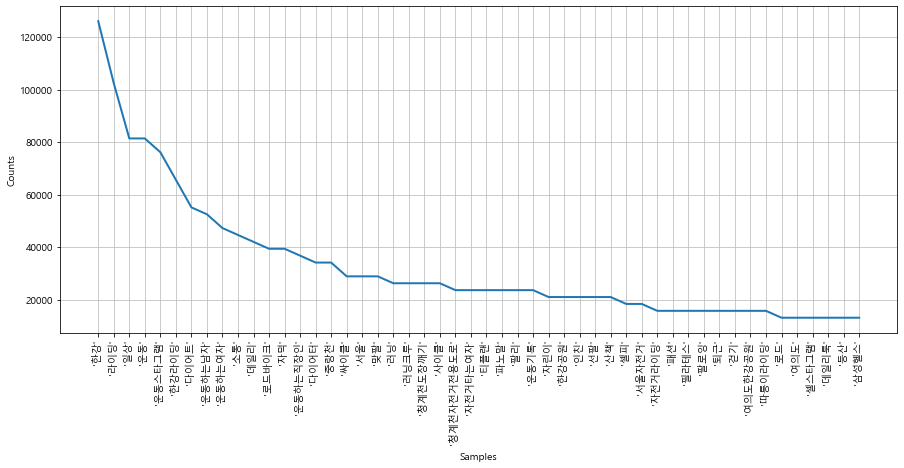

In [51]:
gf_instar = nltk.Text(new_tokens, name='인스타')
plt.figure(figsize=(15,6))
gf_instar.plot(50)
plt.show()

### 워드클라우드 나타내기

In [52]:
data = gf_instar.vocab().most_common(1000)

wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white',
    colormap = 'winter'
).generate_from_frequencies(dict(data))

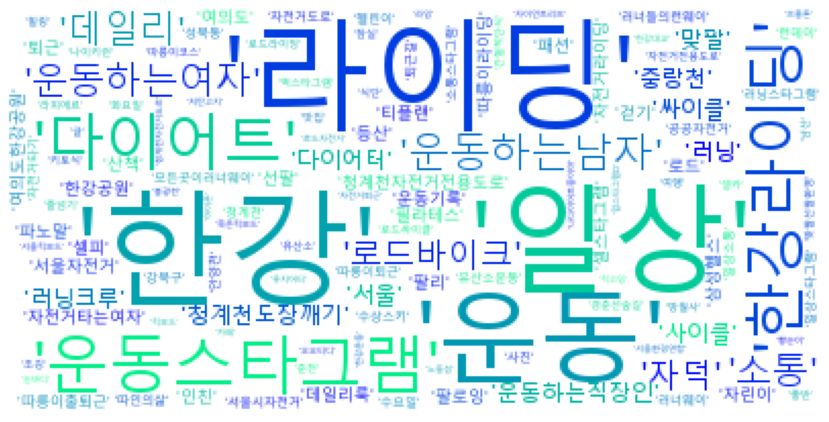

In [53]:
plt.figure(figsize=(15,7.5))
plt.imshow(wc)
plt.axis("off")
plt.show()

### 자전거 이미지

In [54]:
# 자전거 b2 이미지
mask = np.array(Image.open('b2.png'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

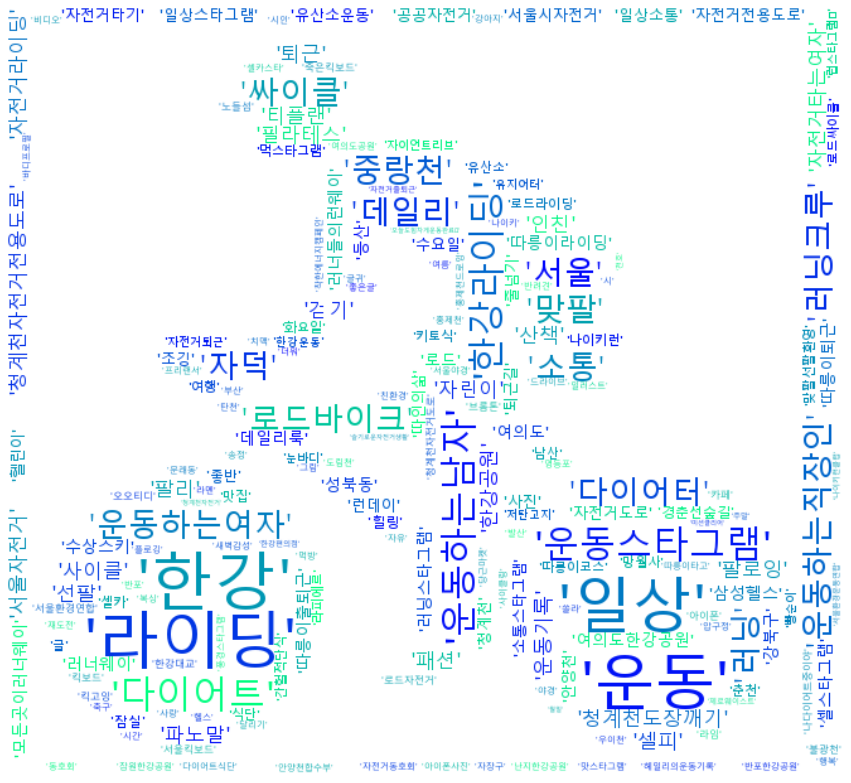

In [63]:
data = gf_instar.vocab().most_common(1000)

wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.1,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=50,
    colormap = 'winter'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()